epoch,train_loss,valid_loss,time
0,3.267673,2.556719,00:11


epoch,train_loss,valid_loss,time
0,1.889407,1.697187,00:08
1,1.619003,1.387644,00:08
2,1.461704,1.225651,00:09
3,1.361831,1.214745,00:08
4,1.236247,0.945937,00:09
5,1.123054,0.857598,00:13
6,1.017776,0.838493,00:08
7,0.930931,0.805965,00:10
8,0.861222,0.799843,00:14
9,0.806395,0.800241,00:14


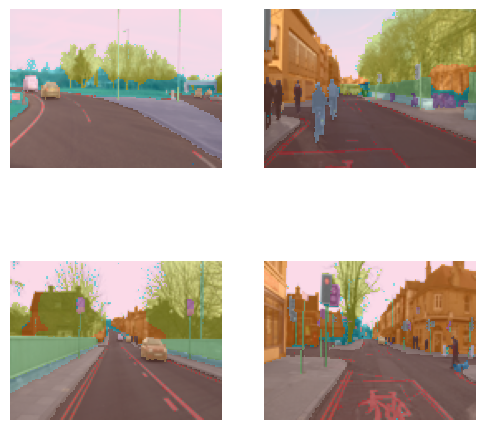

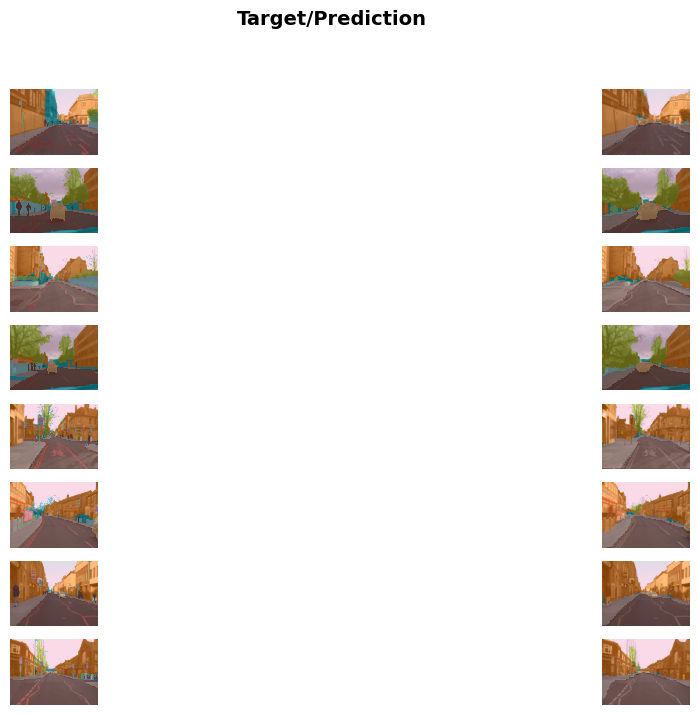

In [38]:
# ✅ Step 1: Import
from fastai.vision.all import *

# ✅ Step 2: Load CamVid Tiny dataset
path = untar_data(URLs.CAMVID_TINY)

# ✅ Step 3: Define DataBlock
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str),
)

# ✅ Step 4: Show a sample batch
dls.show_batch(max_n=4)

# ✅ Step 5: Create and train a U-Net Learner
learn = unet_learner(dls, resnet34)
learn.fine_tune(10)

# ✅ Step 6: Show predictions
learn.show_results(max_n=10, figsize=(14,8))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


epoch,train_loss,valid_loss,accuracy,time
0,0.360434,0.384264,0.830000,00:08
1,0.337315,0.363907,0.840000,00:07
2,0.321901,0.363650,0.820000,00:07
3,0.328406,0.364163,0.860000,00:07
4,0.330596,0.344967,0.860000,00:07


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)



Prediction: (   workclass  education  marital-status  occupation  relationship  race  sex  \
0        5.0        8.0             3.0         0.0           6.0   5.0  1.0   

   native-country  education-num_na       age   fnlwgt  education-num  \
0            40.0               1.0  0.763259 -0.83812       0.751095   

   capital-gain  capital-loss  hours-per-week  salary  
0     -0.145902      4.507649        -0.03563     0.0  , tensor(0), tensor([0.6053, 0.3947]))


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,salary_pred
0,5.0,12.0,1.0,2.0,2.0,5.0,1.0,40.0,2.0,0.689959,-1.606310,-0.031209,-0.145902,-0.216429,-0.278627,1.0,0.0
1,5.0,11.0,3.0,0.0,1.0,5.0,2.0,40.0,1.0,0.909860,1.924155,2.315703,1.882961,-0.216429,3.528322,1.0,1.0
2,5.0,13.0,3.0,5.0,1.0,5.0,2.0,40.0,2.0,0.470058,-0.654151,-0.031209,0.446390,-0.216429,-0.035630,0.0,1.0
3,5.0,10.0,3.0,13.0,1.0,5.0,2.0,40.0,2.0,-0.995946,-0.329739,-0.031209,-0.145902,-0.216429,-0.035630,1.0,0.0
4,5.0,12.0,5.0,2.0,2.0,5.0,1.0,40.0,1.0,-0.995946,-0.176402,-0.422361,-0.145902,-0.216429,0.612361,0.0,0.0
5,5.0,12.0,1.0,0.0,4.0,5.0,1.0,40.0,1.0,-0.409544,0.841859,-0.422361,-0.145902,-0.216429,0.126368,0.0,0.0
6,5.0,9.0,1.0,13.0,2.0,5.0,2.0,40.0,1.0,-0.116344,-0.497667,0.359943,-0.145902,-0.216429,0.369365,1.0,0.0
7,8.0,11.0,3.0,11.0,1.0,5.0,2.0,40.0,2.0,1.569562,0.427918,-0.031209,-0.145902,4.507649,-0.035630,1.0,1.0
8,5.0,7.0,3.0,0.0,1.0,5.0,2.0,40.0,2.0,-0.556145,1.741778,-0.031209,-0.145902,-0.216429,0.207367,0.0,0.0


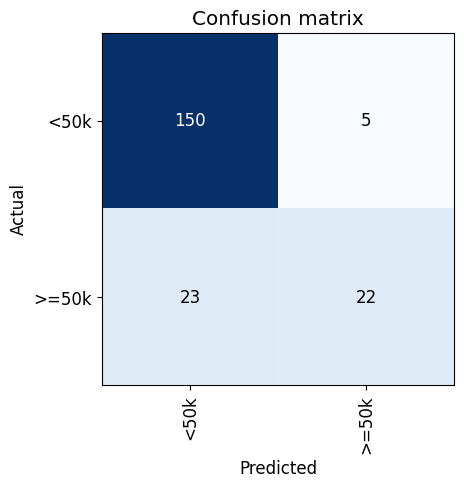

In [40]:
# 📦 Imports
from fastai.tabular.all import *

# 📁 Load Dataset
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

# 🧹 Preprocessing setup
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
procs = [Categorify, FillMissing, Normalize]

# 🧪 DataLoaders
dls = TabularDataLoaders.from_df(
    df,
    path=path,
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=dep_var,
    y_block=CategoryBlock(),
    valid_idx=list(range(800, 1000)),
    bs=64
)

# 🧠 Model training
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(5)

# 🔍 Predict one row
row = df.iloc[0]
pred = learn.predict(row)
print(f"\nPrediction: {pred}")

# 📊 Optional: Interpret results
learn.show_results()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [50]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Transform: convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # 5 epochs
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved as mnist_model.pth")




Epoch 1, Loss: 0.4101
Epoch 2, Loss: 0.1955
Epoch 3, Loss: 0.1414
Epoch 4, Loss: 0.1140
Epoch 5, Loss: 0.0981
Test Accuracy: 96.90%
Model saved as mnist_model.pth


Predicted digit: 8


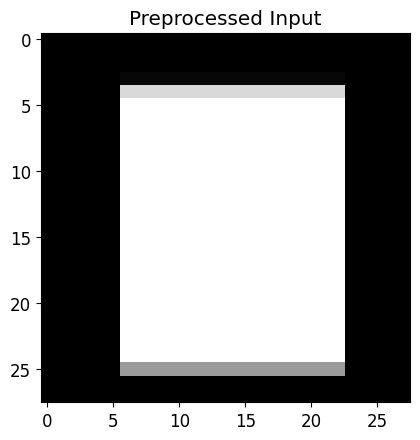

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import argparse

import torch.nn.functional as F

def parse_args():
    parser = argparse.ArgumentParser(description="Train a digit classifier")

    parser.add_argument('--epochs', type=int, default=10, help='Number of training epochs')
    parser.add_argument('--batch_size', type=int, default=32, help='Batch size')
    parser.add_argument('--lr', type=float, default=0.001, help='Learning rate')
    parser.add_argument('--data_dir', type=str, default='./nums', help='Path to image dataset')
    parser.add_argument('--save_path', type=str, default='custom_digit_model.pth', help='Where to save model')

    return parser.parse_args()


# 1. Transform for grayscale image to 28x28 normalized tensor
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# 2. Load custom dataset
data_path = "/Users/abassmac/Desktop/myAI/nums"
dataset = ImageFolder(root=data_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 3. Define neural network
class doSmth(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)         # Flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)             # Output layer

# 4. Training setup
model = doSmth()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 5. Training loop
for epoch in range(1000):
    running_loss = 0.0
    for images, labels in dataloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(dataloader):.4f}")

# 6. Save model
torch.save(model.state_dict(), "custom_digit_model.pth")
print("Model saved as custom_digit_model.pth")

if __name__ == "__main__":
    args = parse_args()

    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    dataset = ImageFolder(root=args.data_dir, transform=transform)
    dataloader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True)

    model = doSmth()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

    for epoch in range(args.epochs):
        running_loss = 0
        for images, labels in dataloader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(dataloader):.4f}")

    torch.save(model.state_dict(), args.save_path)
    print(f"Model saved as {args.save_path}")



Epoch 1, Loss: 2.2980
Epoch 2, Loss: 2.2427
Epoch 3, Loss: 2.1476
Epoch 4, Loss: 2.0086
Epoch 5, Loss: 2.0403
Epoch 6, Loss: 1.8097
Epoch 7, Loss: 2.0460
Epoch 8, Loss: 1.8866
Epoch 9, Loss: 1.7002
Epoch 10, Loss: 1.7415
Epoch 11, Loss: 1.5962
Epoch 12, Loss: 1.7442
Epoch 13, Loss: 1.8950
Epoch 14, Loss: 1.6428
Epoch 15, Loss: 1.6819
Epoch 16, Loss: 1.5391
Epoch 17, Loss: 1.6211
Epoch 18, Loss: 1.3903
Epoch 19, Loss: 1.6980
Epoch 20, Loss: 1.4655
Epoch 21, Loss: 1.3573
Epoch 22, Loss: 1.5121
Epoch 23, Loss: 1.4391
Epoch 24, Loss: 1.4870
Epoch 25, Loss: 1.4039
Epoch 26, Loss: 1.4488
Epoch 27, Loss: 1.4030
Epoch 28, Loss: 1.1561
Epoch 29, Loss: 1.1850
Epoch 30, Loss: 1.3570
Epoch 31, Loss: 1.1151
Epoch 32, Loss: 1.1995
Epoch 33, Loss: 1.0622
Epoch 34, Loss: 1.1605
Epoch 35, Loss: 1.1838
Epoch 36, Loss: 1.2022
Epoch 37, Loss: 1.1327
Epoch 38, Loss: 0.9609
Epoch 39, Loss: 0.9622
Epoch 40, Loss: 1.0278
Epoch 41, Loss: 0.9677
Epoch 42, Loss: 1.1744
Epoch 43, Loss: 0.8247
Epoch 44, Loss: 0.94

In [179]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

img_path = "/Users/abassmac/Desktop/myAI/nums/8/8e.jpg"
img = Image.open(img_path).convert('L')
img_tensor = transform(img).unsqueeze(0)

class doSmth(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = doSmth()
model.load_state_dict(torch.load("custom_digit_model.pth"))
model.eval()

with torch.no_grad():
    output = model(img_tensor)
    _, pred = torch.max(output, 1)
    probs = torch.softmax(output, dim=1)
    print(probs)

    print("Predicted Digit:", pred.item())


tensor([[1.5798e-08, 1.8794e-07, 4.1367e-11, 4.3412e-02, 3.9250e-01, 1.3032e-03, 5.4045e-01, 7.1467e-11, 7.3348e-05, 2.2268e-02]])
Predicted Digit: 6
